In [1]:
#Reading Data
import numpy as np

file_path = 'diabetes_scale.txt'
X = []
y = []
with open(file_path, 'r') as file:
    for line in file:
        elements = line.split()
        label = int(elements[0])
        y.append(label)
        features = np.zeros(8)
        for elem in elements[1:]:
            index, value = elem.split(':')
            features[int(index) - 1] = float(value)  
        X.append(features)
X = np.array(X)
y = np.array(y)
print("Features (X):", X)
print("Labels (y):", y)


Features (X): [[-0.294118    0.487437    0.180328   ...  0.00149028 -0.53117
  -0.0333333 ]
 [-0.882353   -0.145729    0.0819672  ... -0.207153   -0.766866
  -0.666667  ]
 [-0.0588235   0.839196    0.0491803  ... -0.305514   -0.492741
  -0.633333  ]
 ...
 [-0.411765    0.21608     0.180328   ... -0.219076   -0.857387
  -0.7       ]
 [-0.882353    0.266332   -0.0163934  ... -0.102832   -0.768574
  -0.133333  ]
 [-0.882353   -0.0653266   0.147541   ... -0.0938897  -0.797609
  -0.933333  ]]
Labels (y): [-1  1 -1  1 -1  1 -1  1 -1 -1  1 -1  1 -1 -1 -1 -1 -1  1 -1  1  1 -1 -1
 -1 -1 -1  1  1  1  1 -1  1  1  1  1  1 -1 -1 -1  1  1  1 -1  1 -1  1  1
 -1  1  1  1  1 -1  1  1 -1  1  1  1  1 -1  1  1 -1  1 -1  1  1  1 -1  1
 -1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1  1 -1  1  1  1  1 -1  1  1
  1  1  1 -1 -1  1  1  1  1  1  1  1  1 -1 -1 -1  1  1 -1 -1 -1  1  1  1
 -1  1  1  1 -1 -1  1  1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1 -1
  1  1  1  1  1  1  1  1 -1  1 -1 -1  1  1  1 -1  1  1  1

In [2]:
#Improved model
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split




X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = np.where(y_train == -1, 0, y_train)
y_test = np.where(y_test == -1, 0, y_test)


model = Sequential()

#Introducing the sigmoid function
model.add(Dense(1, input_dim=X_train.shape[1], activation='sigmoid'))  

#Compile the model using the Adam optimizer and the binary cross entropy loss function
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")
predictions = model.predict(X_test)


Epoch 1/50
20/20 [==============================] - 1s 17ms/step - loss: 0.7986 - accuracy: 0.3909 - val_loss: 0.7902 - val_accuracy: 0.3961
Epoch 2/50
20/20 [==============================] - 0s 4ms/step - loss: 0.7745 - accuracy: 0.4072 - val_loss: 0.7678 - val_accuracy: 0.4026
Epoch 3/50
20/20 [==============================] - 0s 4ms/step - loss: 0.7533 - accuracy: 0.4300 - val_loss: 0.7481 - val_accuracy: 0.4351
Epoch 4/50
20/20 [==============================] - 0s 3ms/step - loss: 0.7344 - accuracy: 0.4674 - val_loss: 0.7287 - val_accuracy: 0.4545
Epoch 5/50
20/20 [==============================] - 0s 3ms/step - loss: 0.7163 - accuracy: 0.5049 - val_loss: 0.7125 - val_accuracy: 0.5000
Epoch 6/50
20/20 [==============================] - 0s 3ms/step - loss: 0.7011 - accuracy: 0.5423 - val_loss: 0.6980 - val_accuracy: 0.5519
Epoch 7/50
20/20 [==============================] - 0s 3ms/step - loss: 0.6872 - accuracy: 0.5782 - val_loss: 0.6849 - val_accuracy: 0.6039
Epoch 8/50
20/20 [=

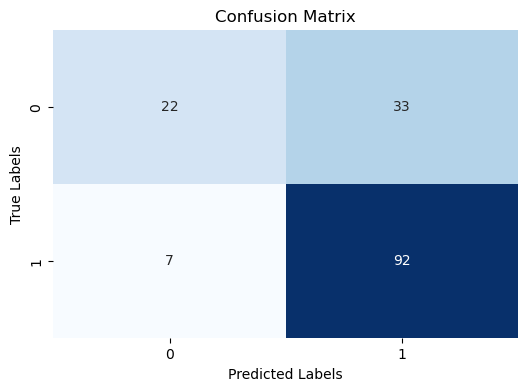

In [7]:
#confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


y_pred = (predictions > 0.5).astype("int32") 
cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [4]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.76      0.40      0.52        55
           1       0.74      0.93      0.82        99

    accuracy                           0.74       154
   macro avg       0.75      0.66      0.67       154
weighted avg       0.74      0.74      0.72       154



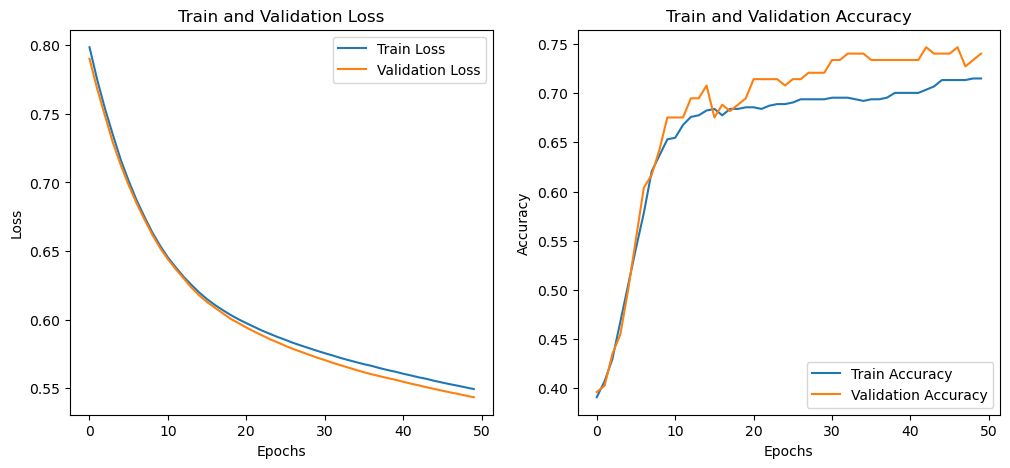

In [5]:
#Plot the training and validation loss curves
import matplotlib.pyplot as plt




def plot_loss_accuracy(history):

    plt.figure(figsize=(12, 5))


    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Train and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()


    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Train and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()


plot_loss_accuracy(history)


5/5 [==============================] - 0s 3ms/step


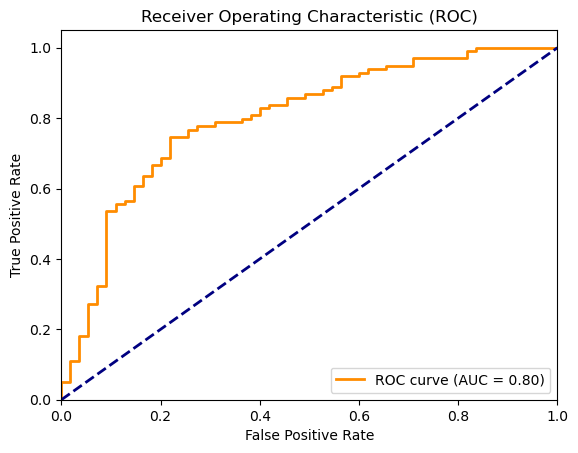

In [6]:
#ROC curve and AUC value
from sklearn.metrics import roc_curve, auc





y_pred_prob = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()